#**SUPERMARKET SALES ANALYSIS**

**AIM**

>Supermarkets are expanding in most densely populated places, and market rivalry is fierce. The collection contains historical sales data from three different grocery branches during a three-month period. With this dataset, predictive data analytics approaches are simple to implement.

**DATA DESCRIPTION**

>Information about the attributes in the dataset are provided below:

Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in $

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10

###Import libraries and load dataset

In [2]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Loading and reading the dataset
dataframe=pd.read_csv('/content/drive/MyDrive/supermarket_sales - Sheet1.csv')
df=dataframe.copy()
#Preview of dataset
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
#shape of dataset
df.shape

(1000, 17)

>the dataset contains 1000 instances and 17 supporting attributes.

In [6]:
#check for null or missing values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

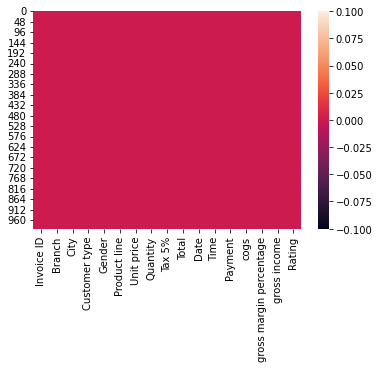

In [7]:
#heatmap showing if null values are present
sns.heatmap(df.isnull())

>the above plot shows dataset is free from null values.

In [8]:
#statistical description of dataset
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [9]:

#check datatype of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

>the data contains categorical and numerical values.

In [10]:
df=df.drop(['Invoice ID', 'Date', 'Time'], axis = 1)

In [11]:
df['gross margin percentage'].unique()

array([4.76190476])

In [12]:

df.head(10)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3
5,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,Ewallet,597.73,4.761905,29.8865,4.1
6,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,Ewallet,413.04,4.761905,20.6520,5.8
7,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,Ewallet,735.60,4.761905,36.7800,8.0
8,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,Credit card,72.52,4.761905,3.6260,7.2
9,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,Credit card,164.52,4.761905,8.2260,5.9


In [13]:
df.shape

(1000, 14)

converting categorical attribute "Gender" to numeric for easy computation.

In [14]:
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


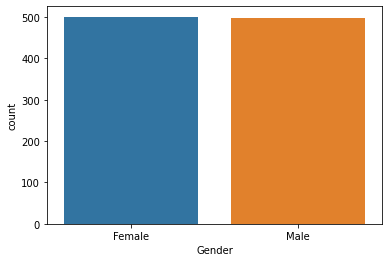

In [15]:
sns.countplot('Gender', data=df)

In [16]:
gender_dummies = pd.get_dummies(df['Gender'])
gender_dummies.head()

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [17]:
df = pd.concat([df, gender_dummies], axis = 1)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Female,Male
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,1,0
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,1,0
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,0,1
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,0,1
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,0,1


In [18]:
df = df.drop(['Gender'], axis = 1)

###Data Visualization

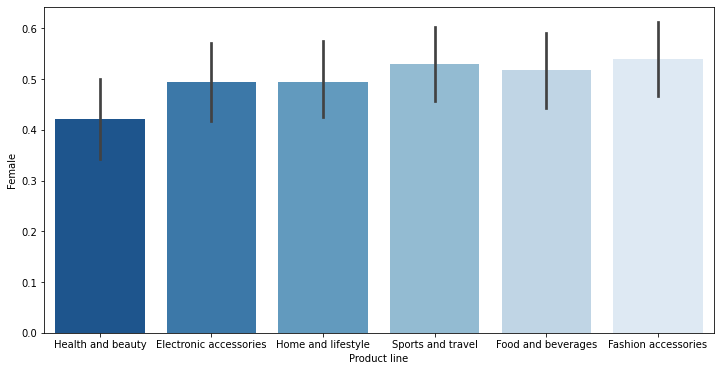

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Product line'], y=df['Female'], palette='Blues_r')

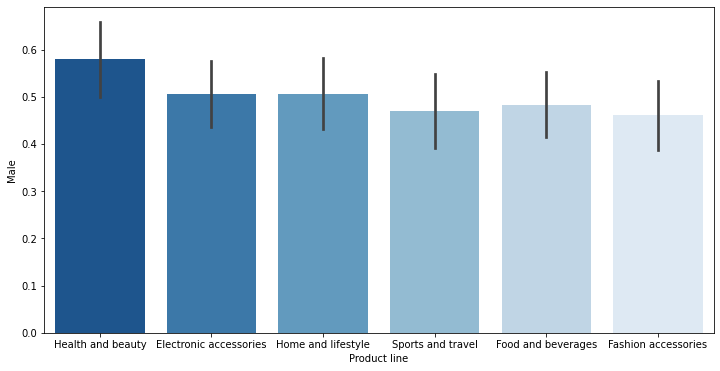

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Product line'], y=df['Male'], palette='Blues_r')

In [21]:
df['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

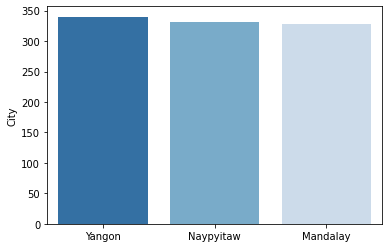

In [22]:
sns.barplot(x=df['City'].unique(), y = df['City'].value_counts(), palette='Blues_r')

In [23]:
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

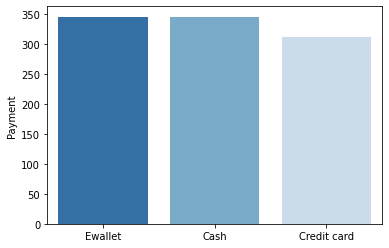

In [24]:
sns.barplot(x=df['Payment'].unique(), y=df['Payment'].value_counts(), palette='Blues_r')

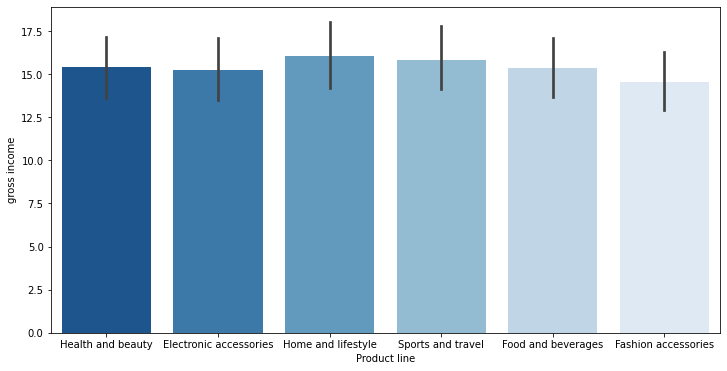

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Product line'], y=df['gross income'], palette='Blues_r')

([<matplotlib.axis.XTick at 0x7f0a45e72210>,
 <a list of 11 Text major ticklabel objects>)

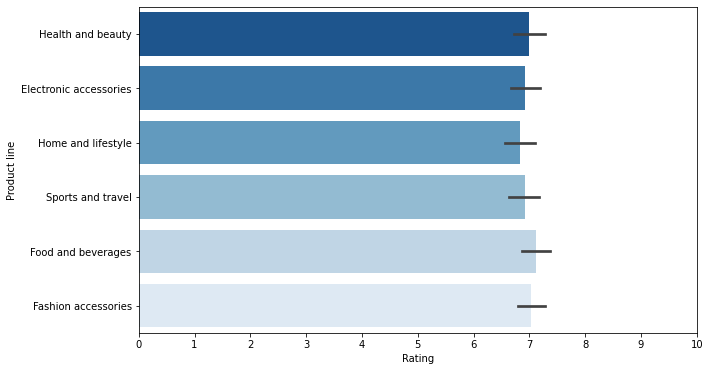

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(y=df['Product line'], x=df['Rating'], palette='Blues_r')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])

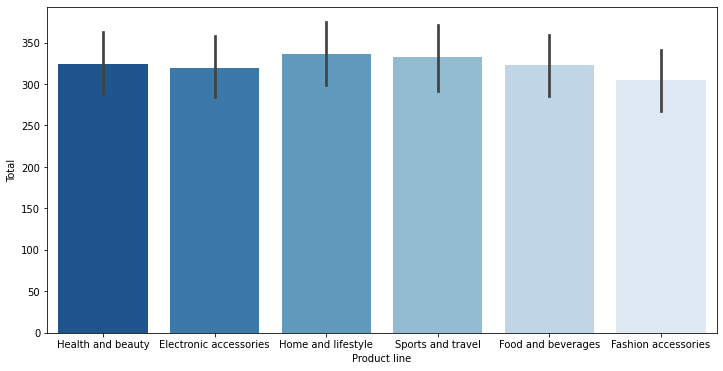

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Product line'], y=df['Total'], palette='Blues_r')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


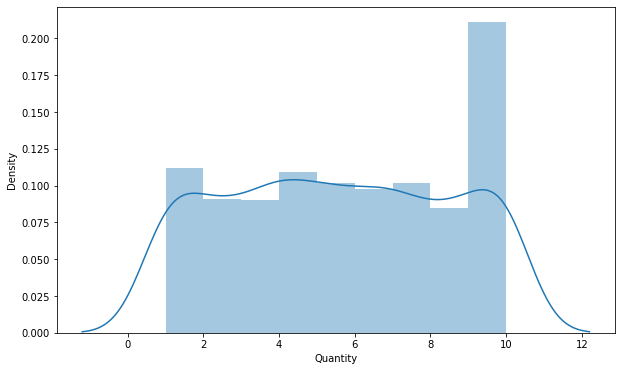

In [29]:
plt.figure(figsize=(10,6))
sns.distplot(df['Quantity'])

In [30]:
quantity=pd.DataFrame(df['Quantity'].value_counts())
quantity

,Quantity
10,119
1,112
4,109
7,102
5,102
6,98
9,92
2,91
3,90
8,85


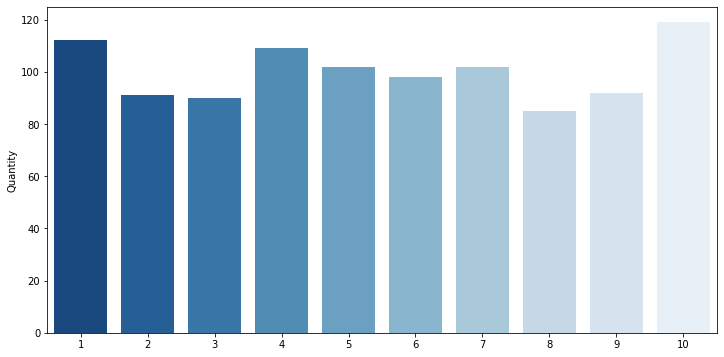

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(x=quantity.index, y=quantity['Quantity'], palette='Blues_r')

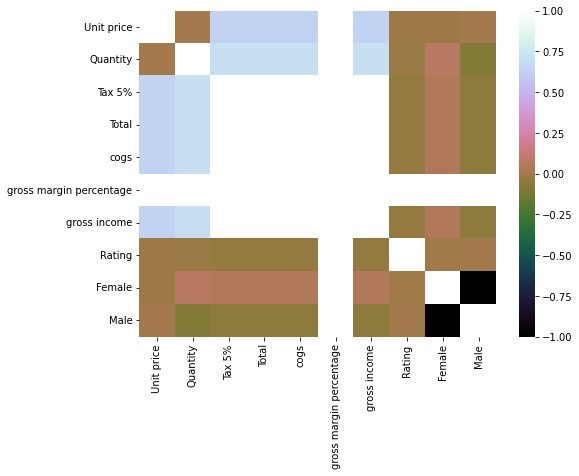

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='cubehelix')

the above plot shows correlation between independent and dependent features of the dataset. there does not exist problem of collinearity.

###Modeling



#####Linear Regression Model

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [36]:
#splitting train and test data
train=df.iloc[:,[4,6]].values
test=df.iloc[:,7].values
X_train,X_test,y_train,y_test=train_test_split(train,test,test_size=0.2, random_state=0)

In [45]:
#loading Linear Regression and fitting train data
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [47]:
#predicting output for test input data
pred=reg.predict(X_test)
pred[:5]

array([183.645 , 450.1035, 252.042 , 139.923 , 231.2415])

In [40]:
#model performance on test data
reg.score(X_test,y_test)

1.0

In [ ]:
#the constant obtained for best fit line of linear regressor
reg.coef_

array([1.75058695e-15, 2.10000000e+01])

In [41]:
#the intercept obtained for best fit line of linear regressor
reg.intercept_

-1.1368683772161603e-13

#####Model Evaluation

In [49]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
mse=mean_squared_error(y_test,pred,squared=False)
mae=mean_absolute_error(y_test,pred)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)

Mean Squared Error:  6.239489747226387e-14
Mean Absolute Error:  4.808597964256478e-14


###Result and Conclusion

>The dataset is taken from kaggle repository for sales analysis. The machine learning algorithm used for analysis is **Linear Regression**. The error obtained on approaching to find best fit line is approximately negligible which shows it can be taken into practice for analysation of sales further. Along with analysis one can also go for prediction of sales.